# Dijkstra

## Aufgabe

Implementieren Sie eine `MapSolver` Klasse, die den Dijkstra ablgorithmus verwendet um den kürzesten Weg zwischen einem Startpunkt und einem Endpunkt berechnet.


```{note}
Sollten Sie noch weitere Methoden oder Klassen benötigen, können Sie diese gerne zusätzlich implementieren.
```

Folgendes sind die Inputs für die Klasse:

- **map_:** 2D Numpy Array. Alle wände haben den Wert `np.inf` und alle begehbaren Felder haben den Wert `0`

Beispiel:

```
[[0, np.inf, np.inf],
 [0,   0   , 0     ],
 [0, np.inf, np.inf]]
```

- **start:** Tuple. Tupel, dass die indizes für die Startposition auf der Map enthält

Beispiel:

```
(0,0)
```

- end: Tuple. Tupel, dass die indizes für die Endosition auf der Map enthält

Beispiel:

```
(1,2)
```

Die zu implementierende `__call__` Methode soll ein Tupel mit folgendem Inhalt zurück geben:

1. **distance_map:** 2D Numpy Array. Enthält alle Distanzen zur start Position. Die Dimension ist die selbe wie die Dimension der Input Map.

Beispiel:

```
[[0, np.inf, np.inf],
 [1,   2   , 3     ],
 [2, np.inf, np.inf]]
```


2. **path:** Liste and Tupel: Liste an Positionen vom Start- bis zum Endpunkt.


```
[(0,0), (1,0), (1,1), (1,2)]
```

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import json
import os

In [2]:
class MapSolver:

    def __init__(self, map_, start, end):
        """
        :param map_: 2d Array
        :param start: Tuple
        :param end: Tuple
        """
        self.map = map_.copy()
        self.start = start
        self.end = end
        self.dim = map_.shape[0]

        # your code

    def dijkstra(self):
        """
        Dijkstra's algorithm for finding the shortest path between two points in a graph

        :return distances: list of distances from start to every other point
        """

        # your code here
        pass

    def get_path_from_distances(self, distances):
        """
        :param distances: list of distances from start to every other point (dijkstra)
        :return path: list of positions from start to end
        """

        # your code here
        pass
        

    def __call__(self):
        """
        calculates shortest path for given map from start to end position.
        Also returns the calculated distances from every position to start position

        :return (distance_map, path): 2d array, list of all positions from start to end
        """
        distance_map, path = None, None 

        # your code here

        
        # Bitte folgende 2 Zeilen nach Implementation löschen
        distance_map = self.map
        path = []

        assert distance_map.shape == self.map.shape, "distance_map must have the same shape as self.map"
        assert isinstance(path, list)

        return distance_map, path

Wenn Sie wollen, können Sie folgende Helfer Klasse verwenden:

In [3]:
class MapValidator:

    def __init__(self, map_):
        self.map = map_
        self.dim = map_.shape[0]
        self.directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    def direction_integrity(self, random_direction, last_direction):
        is_perp = random_direction[0] == - \
            last_direction[0] and random_direction[1] == -last_direction[1]

        is_same = random_direction[0] ==  \
            last_direction[0] and random_direction[1] == last_direction[1]

        return is_perp or is_same

    def hits_wall(self, direction, pos):
        return (pos[0] == 0 and direction[0] < 0) or \
            (pos[1] == 0 and direction[1] < 0) or \
            (pos[0] + direction[0] > self.dim - 1) or \
            (pos[1] + direction[1] > self.dim - 1)

    def is_valid_position(self, pos):
        is_out_of_bounds = pos[0] < 0 or pos[0] >= self.dim or pos[1] < 0 or pos[1] >= self.dim

        if is_out_of_bounds:
            return False

        is_wall = self.map[pos] == np.inf

        return not is_wall

In [4]:
class MapGenerator:
    """
    Generates a 2D numpy array with a random map
    """

    def __init__(self, dim=10, max_tunnels=20, max_length=9):
        self.dim = dim
        self.max_tunnels = max_tunnels
        self.max_length = max_length

    def _get_random_position(self):
        return (random.randint(0, self.dim - 1),
                random.randint(0, self.dim - 1))

    def _get_random_start_and_end(self):
        start = self._get_random_position()
        end = self._get_random_position()
        validator = self._get_validator()

        while not validator.is_valid_position(start):
            start = self._get_random_position()

        while not validator.is_valid_position(end) or end == start:
            end = self._get_random_position()

        return start, end

    def _get_validator(self):
        return MapValidator(self.map)

    def _create_map(self):
        """
        :return map_: 2D numpy array
        """

        last_direction = []

        # init start point
        current_row = random.randint(0, self.dim - 1)
        current_column = random.randint(0, self.dim - 1)
        tunnels = self.max_tunnels
        validator = self._get_validator()
        random_direction = random.choice(validator.directions)

        while tunnels > 0:

            # init tunnel
            random_length = random.randint(1, self.max_length)
            tunnel_length = 0

            while tunnel_length < random_length:
                if validator.hits_wall(random_direction, (current_row, current_column)):
                    break

                self.map[current_row][current_column] = 0
                current_row += random_direction[0]
                current_column += random_direction[1]
                tunnel_length += 1

            last_direction = random_direction
            tunnels -= 1

            # get new direction
            while validator.direction_integrity(random_direction, last_direction):
                random_direction = random.choice(validator.directions)

    def _init_map(self):
        return np.full((self.dim, self.dim), np.inf)

    def __call__(self):
        """
        :return map_, start, end: 2D numpy array, tuple, tuple
        """

        self.map = self._init_map()
        self._create_map()
        start, end = self._get_random_start_and_end()

        return self.map, start, end


class MapDataset:

    def __init__(self, file='maps.json', load=False, write=False, solver=None, num_maps=3):
        self.file = file
        self.num_maps = num_maps
        self.map_data = []
        self.solver = solver

        if load:
            assert os.path.exists(self.file), "File does not exist"
            self.map_data = self.from_json()
            return

        self.generator = MapGenerator()
        for _ in range(num_maps):
            map_, start, end = self.generator()

            if self.solver:
                distances, path = self.solver(map_, start, end)()
                self.map_data.append((map_, start, end, distances, path))
                continue

            self.map_data.append((map_, start, end, map_.copy(), []))

        if write:
            self.to_json()

    def __len__(self):
        return len(self.map_data)

    def __getitem__(self, i):
        return self.map_data[i]

    def from_json(self):
        with open(self.file, 'r') as f:
            lines = f.read()

            serializable_map_data = json.loads(lines)

            iter_ = map(self._item_from_json, serializable_map_data)

        return list(iter_)

    def _item_from_json(self, x):
        map_ = np.array(x['map'])
        start = tuple(x['start'])
        end = tuple(x['end'])
        distances = np.array(x['distances'])
        path = list(map(tuple, x['path']))

        return map_, start, end, distances, path

    def to_json(self):

        serializable_map_data = map(lambda x: {
            'map': x[0].tolist(),
            'start': list(x[1]),
            'end': list(x[2]),
            'distances': x[3].tolist(),
            'path': x[4],
        }, self.map_data)

        result = json.dumps(list(serializable_map_data))

        # write file
        with open(self.file, 'w') as f:
            f.write(result)


class MapViewer:

    def __init__(self, dataset):
        self.dataset = dataset

    def _transform_map(self, ax, map_, start, end, distance, path):
        image = map_.copy()
        dim = map_.shape[0]
        original_map = map_.copy()

        for i in range(dim):
            for j in range(dim):

                if distance[i, j] == np.inf:
                    image[i, j] = 300
                    original_map[i, j] = 300
                    continue

                ax.text(j, i, int(distance[i, j]), ha="center", va="center")

        for p in path:
            image[p] = 100

        image[start] = 150
        image[end] = 200

        return image, original_map

    def __call__(self):

        fig, axs = plt.subplots(2, len(self.dataset), figsize=(10, 10))

        for i, ax_col in enumerate(axs.T):
            img, original_map = self._transform_map(
                ax_col[0], *self.dataset[i])

            ax_col[0].imshow(img, cmap="rainbow")
            ax_col[0].set_title("Map {}".format(i + 1))

            ax_col[1].imshow(original_map, cmap="rainbow")
            ax_col[1].set_title("Original Map {}".format(i + 1))

        # fig.tight_layout()
        plt.show()

## Beispiel Output

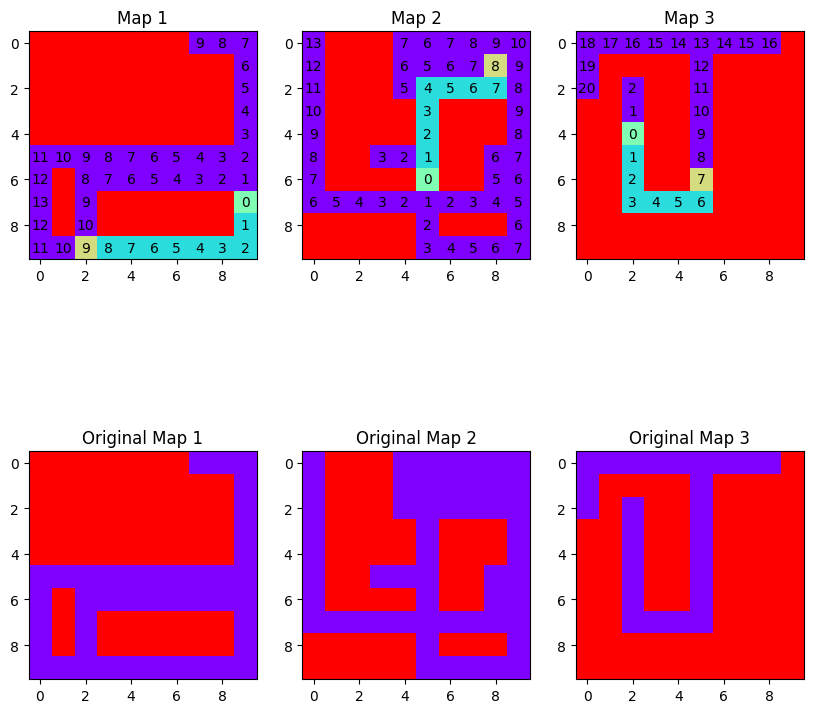

In [5]:
dataset = MapDataset(load=True)
MapViewer(dataset)()

## Output

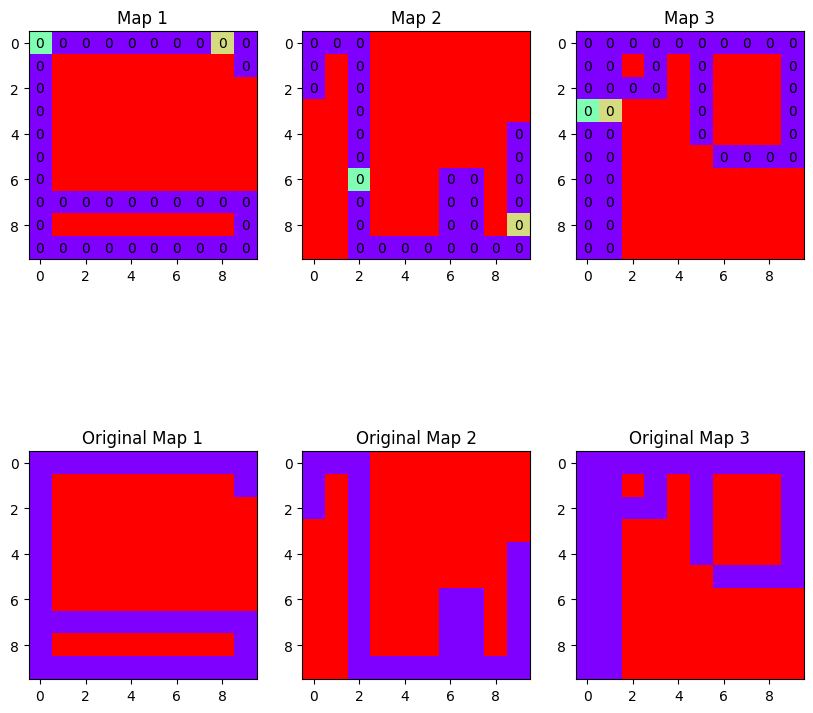

In [6]:
dataset = MapDataset(solver=MapSolver)
MapViewer(dataset)()